# How to handle time series data with ease

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air_quality = pd.read_csv("air_quality_no2_long.csv")

In [3]:
air_quality = air_quality.rename(columns={"date.utc": "datetime"})

In [4]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [5]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

## Using pandas datetime properties

### I want to work with the dates in the column `datetime` as datetime objects instead of plain text

In [6]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])


In [7]:
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

#### Initially, the values in `datetime` are character strings and do not provide any datetime operations (e.g. extract the year, day of the week,…). By applying the `to_datetime` function, pandas interprets the strings and convert these to datetime (i.e. `datetime64[ns, UTC]`) objects. In pandas we call these datetime objects similar to `datetime.datetime` from the standard library as `pandas.Timestamp`.

### Usefulness of the `pandas.Timestamp` objects

### What is the start and end date of the time series data set we are working with?

In [8]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

### Using `pandas.Timestamp` for datetimes enables me to calculate with date information and make them comparable. Hence,I can use this to get the length of my time series.

In [9]:
air_quality["datetime"].max() - air_quality["datetime"].min()


Timedelta('44 days 23:00:00')

#### The result is a `pandas.Timedelta` object, similar to `datetime.timedelta` from the standard Python library and defining a time duration.

### I want to add a new column to the `DataFrame` containing only the month of the measurement

In [10]:
air_quality["month"] = air_quality["datetime"].dt.month

In [11]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


#### By using `Timestamp` objects for dates, a lot of time-related properties are provided by pandas. For example the `month`, but also `year`, `quarter`,… All of these properties are accessible by the `dt` accessor.

### What is the average `NO2` concentration for each day of the week for each of the measurement locations?

In [12]:
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

### Plot the typical `No2` pattern during the day of our time series of all stations together. In other words, what is the average value for each hour of the day?

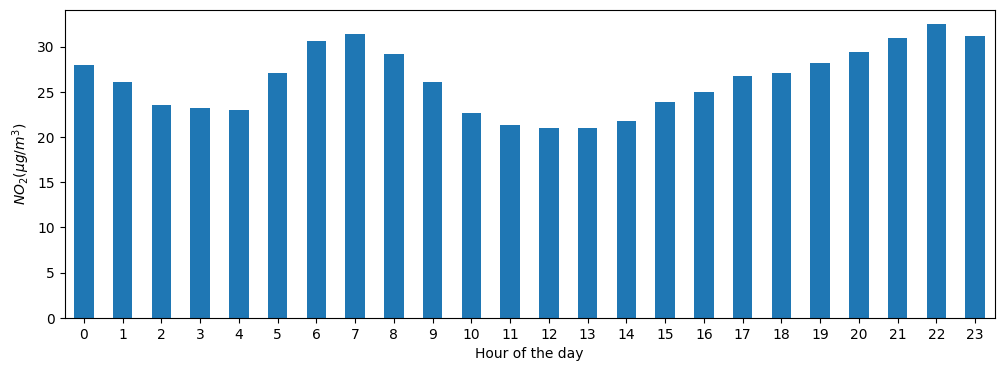

In [15]:
fig, axs = plt.subplots(figsize=(12, 4))

air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Hour of the day");  # custom x label using Matplotlib

plt.ylabel("$NO_2 (µg/m^3)$");

#### Similar to the previous case, we want to calculate a given statistic (e.g. mean ) for each hour of the day and we can use the split-apply-combine approach again. For this case, we use the datetime property `hour` of pandas `Timestamp`, which is also accessible by the `dt` accessor.

## Datetime as index

### The `pivot()` method reshapes the data table with each of the measurements locations as a separate column.

In [16]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")

no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


### Note

By pivoting the data, the datetime information became the index of the table. In general, setting a column as an index can be achieved by the `set_index` function.

### Working with a datetime index (i.e. `DatetimeIndex`) provides powerful functionalities. For example, we do not need the `dt` accessor to get the time series properties, but have these properties available on the index directly.